# **<font size=4 color=#BB3D00 face=微软雅黑>两个指数序列的互相关</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/ug/cross-correlation-of-two-exponential-sequences.html     
描述：本案例由1个示例构成
### - <font color=DarkOrChid size=3>示例：计算并绘制两个16样本指数序列的互相关</font>

## **<font size=3 face=微软雅黑>※Python案例</font>**

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例：计算并绘制两个16样本指数序列的互相关</font>

计算并绘制两个16样本指数序列的互相关, $x_a=0.8^n$and $x_b=0.92^n$, with $n≥0$.

In [2]:
import numpy as np
from scipy import signal
import sympy
import matplotlib.pyplot as plt

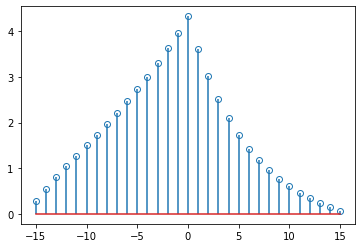

In [3]:
N = 16
n = np.arange(0, N)

a = 0.84
b = 0.92

xa = a**n
xb = b**n

r = signal.correlate(xa,xb)

x = np.arange(-(N-1), N)

fig, axs = plt.subplots()
markerline, stemlines, baseline = axs.stem(
    x, r, markerfmt='o', bottom= 0 )
markerline.set_markerfacecolor('none')
fig.savefig('ab的互相关（用correlate函数）.png',dpi=500)


通过分析确定c，以检查结果的正确性。使用较大的采样率来模拟连续情况。序列的互相关函数 $x_a(n)=a_n$， $x_b(n)=b_n$ $n≥0$,$0<a$,$b<1$, $$c_{a b}(n)=\frac{1-(a b)^{N-|n|}}{1-a b} \times\left\{\begin{array}{cl}
a^{n}, & n>0, \\
1, & n=0, \\
b^{-n}, & n<0 .
\end{array}\right.$$

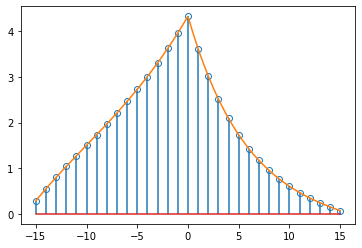

In [4]:
fs = 10;
nn = np.linspace(-(N-1),(N-1),300)
def cab(n):
    i = 0
    cnn = []
    while i<len(n):
        if n[i] > 0:
            cn = (1 - (a*b)**(N-abs(n[i])))/(1 - a*b)*a**n[i]
        if n[i] == 0:
            cn = (1 - (a*b)**(N-abs(n[i])))/(1 - a*b)
        if n[i] < 0:
            cn = (1 - (a*b)**(N-abs(n[i])))/(1 - a*b)*b**(-n[i])
        i = i+1
        cnn = np.append(cnn,cn)
    return cnn

cout = cab(nn)
fig,ax = plt.subplots()
markerline, stemlines, baseline = ax.stem(
    x, r, markerfmt='o', bottom= 0 )
markerline.set_markerfacecolor('none')
ax.plot(nn,cout)
fig.savefig('ab的互相关（用互相关公式推导）.png',dpi=500)

验证切换操作数的顺序是否会反转顺序。

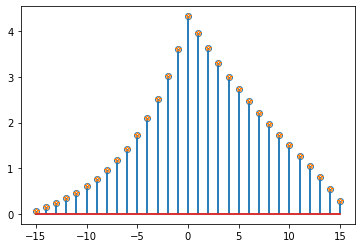

In [18]:
r1 = signal.correlate(xb,xa)
fig,ax1 = plt.subplots()
markerline, stemlines, baseline = ax1.stem(x, r1, markerfmt='o', bottom= 0 )
ax1.set_label('ba')
markerline.set_markerfacecolor('none')


rrev = list(reversed(r))
markerline, stemlines, baseline = ax1.stem(x, rrev, markerfmt='*', bottom= 0 )
ax1.set_label('reversed(ab)')
markerline.set_markerfacecolor('none')

fig.savefig('ba的互相关（用reversed验证）.png',dpi=500)


生成20个样本的指数序列 $x_c=0.77^n$。计算并绘制其互相关 $x_a$和$x_b$。输出滞后，使打印更容易。xcorr在较短序列的末尾追加零，以匹配较长序列的长度。

In [5]:
xc = []
for n in range(0, 20, 1):
    x_ = 0.77**n
    xc = np.append(xc, x_)

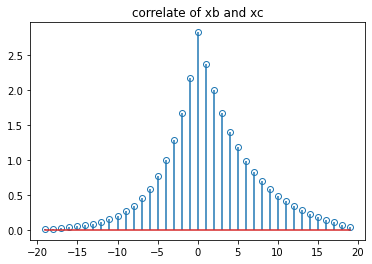

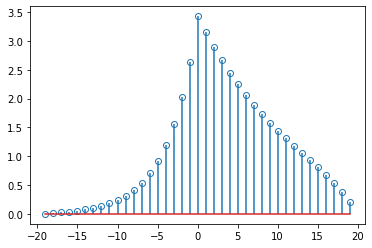

In [6]:

N1 = 20
n1 = np.arange(0, N1)

xa1 = a**n1
xb1 = b**n1

rac = signal.correlate(xa1,xc)
rbc = signal.correlate(xb1,xc)

x1 = np.arange(-(N1-1), N1)
fig,axa = plt.subplots()
markerline, stemlines, baseline = axa.stem(x1, rac, markerfmt='o', bottom= 0 )
markerline.set_markerfacecolor('none')
axa.set_title('correlate of xa and xc')
fig.savefig('ac的互相关.png',dpi=500)

fig, axb = plt.subplots()
markerline, stemlines, baseline = axb.stem(x1, rbc, markerfmt='o', bottom= 0 )
markerline.set_markerfacecolor('none')
axa.set_title('correlate of xb and xc')
fig.savefig('bc的互相关.png',dpi=500)